<a href="https://colab.research.google.com/github/nikhilgang/DEEP-LEARNING_implementation/blob/master/Fashion_MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [0]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)



In [0]:
training_images, test_images = training_images / 255.0, test_images / 255.0


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
#model.fit(training_images, training_labels, epochs=20)

history = model.fit(training_images, training_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0898 - accuracy: 0.9659 - val_loss: 0.3128 - val_accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0779 - accuracy: 0.9703 - val_loss: 0.3391 - val_accuracy: 0.9135
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0695 - accuracy: 0.9734 - val_loss: 0.3742 - val_accuracy: 0.9101
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0629 - accuracy: 0.9762 - val_loss: 0.3860 - val_accuracy: 0.9089
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0574 - accuracy: 0.9782 - val_loss: 0.3901 - val_accuracy: 0.9105


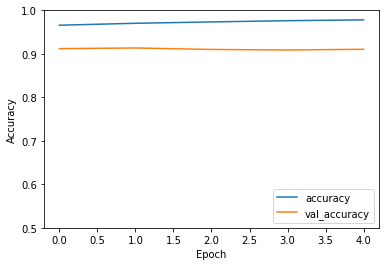

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Implementation with callbacks

In [0]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9866
[0.053239092230796814, 0.9865999817848206]
